<a href="https://colab.research.google.com/github/jovanneconde/Simulacion-1/blob/main/portafolio%20proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

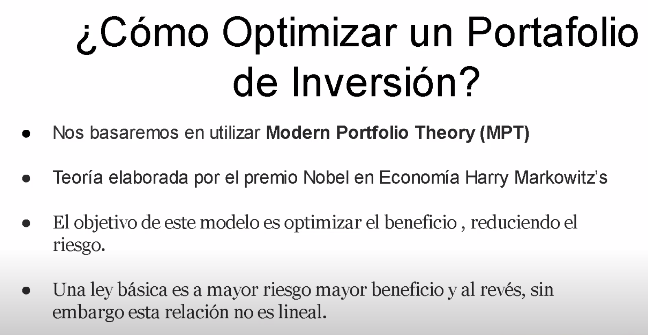

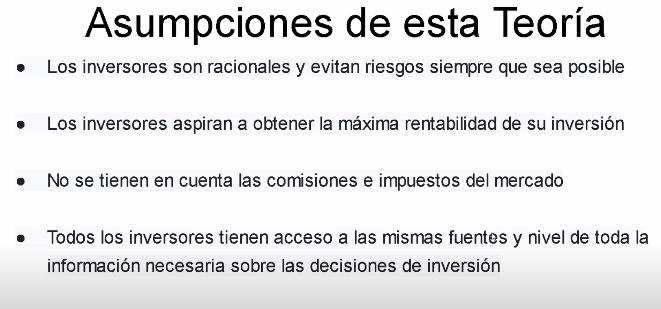

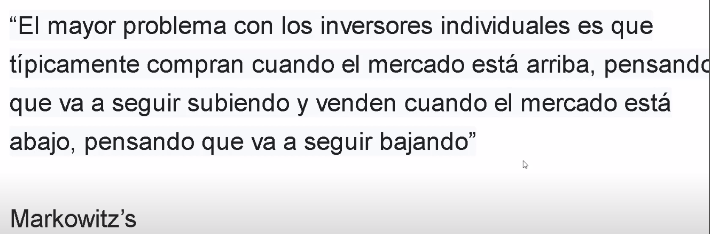

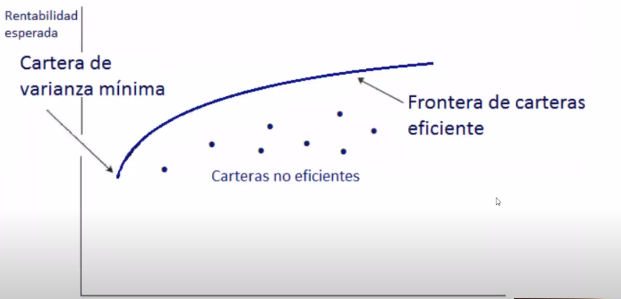

In [87]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [88]:
import yfinance as yf

# Especifica el símbolo de la acción y el rango de fechas
symbol = 'MSFT', 'AMZN', 'TSLA', 'PG', 'SPOT'
start_date = '2022-01-01'
end_date ='2023-01-01'

# Utiliza yfinance para obtener los datos de Yahoo Finance
stocks = yf.download(symbol, start=start_date,end=end_date)['Adj Close']

# Muestra los primeros registros de los datos
print(data.head())


[*********************100%***********************]  5 of 5 completed
                 AMZN        MSFT          PG       SPOT        TSLA
Date                                                                
2023-01-03  85.820000  238.460144  149.687668  81.900002  108.099998
2023-01-04  85.139999  228.029129  150.339447  81.330002  113.639999
2023-01-05  83.120003  221.270844  148.472931  81.580002  110.339996
2023-01-06  86.080002  223.878601  152.008469  83.540001  113.059998
2023-01-09  87.360001  226.058380  150.151810  85.040001  119.769997


<Axes: xlabel='Date'>

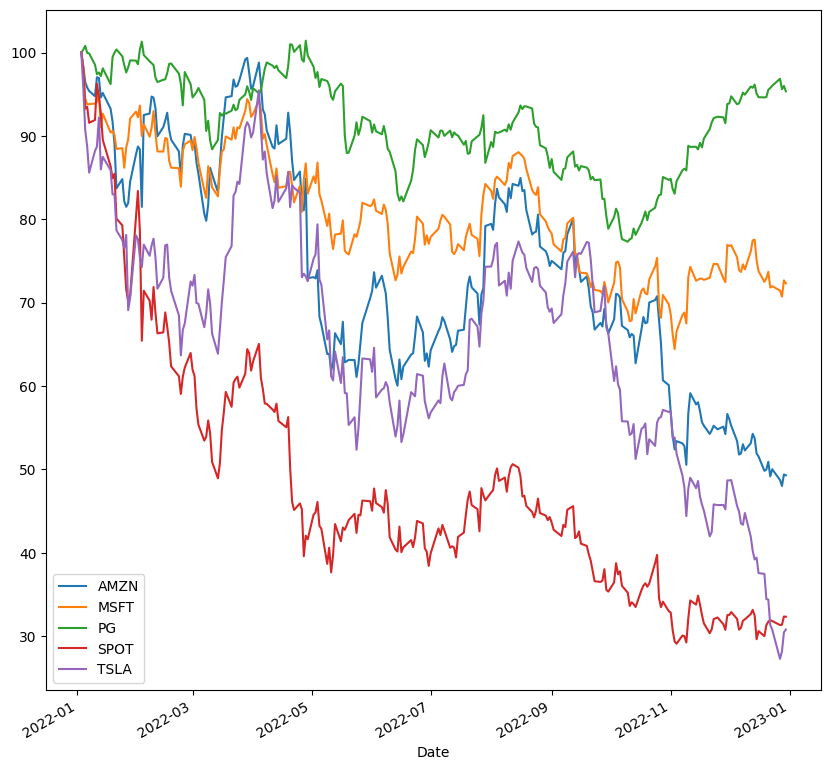

In [89]:
(stocks/stocks.iloc[0]*100).plot(figsize=(10,10))

In [90]:
def calcular_retornos(stocks):
  return stocks.pct_change()

In [91]:
retornos=calcular_retornos(stocks)
retornos.dropna()
retornos.sum()

AMZN   -0.582284
MSFT   -0.262126
PG     -0.023599
SPOT   -0.908997
TSLA   -0.961875
dtype: float64

In [92]:
retornos

,AMZN,MSFT,PG,SPOT,TSLA
Date,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.016916,-0.017147,0.003499,-0.020069,-0.041833
2022-01-05,-0.018893,-0.038388,0.004527,-0.048316,-0.053471
2022-01-06,-0.006711,-0.007902,-0.008404,0.002503,-0.021523
2022-01-07,-0.004288,0.000510,-0.000553,-0.020546,-0.035447
...,...,...,...,...,...
2022-12-23,0.017425,0.002267,0.002825,-0.003335,-0.017551
2022-12-27,-0.025924,-0.007414,0.008714,-0.015187,-0.114089
2022-12-28,-0.014692,-0.010255,-0.012926,0.001176,0.033089


In [93]:
def retorno_log(stocks):
  return np.log(stocks) - np.log(stocks.shift(1))

In [ ]:
log_retornos=retorno_log(stocks)
log_retornos.dropna()
log_retornos.sum()

In [68]:
log_retornos.sum().mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of AMZN   -0.707358
MSFT   -0.324169
PG     -0.047633
SPOT   -1.129009
TSLA   -1.177634
dtype: float64>

In [69]:
num_stocks = len(list_stocks)
random_array=np.random.random(num_stocks)

In [70]:
pesos=np.random.random(num_stocks)
pesos/=np.sum(pesos)

In [71]:
pesos

array([0.19284418, 0.29145316, 0.07253637, 0.14580212, 0.29736418])

In [72]:
np.sum(pesos*log_retornos.mean())*250

-0.7491432805703253

In [73]:
np.dot(3,4)

12

In [74]:
a=[1,2]
b=[2,2]
np.dot(a,b)

6

In [75]:
a=[[1,0],[0,1]]
b=[[4,1],[2,2]]
np.dot(a,b)

array([[4, 1],
       [2, 2]])

In [76]:
x=np.array([[1.,2.],[3.,4.]])
print(x)

[[1. 2.]
 [3. 4.]]


In [77]:
print(x.T)

[[1. 3.]
 [2. 4.]]


In [78]:
varianza=np.dot(pesos.T,np.dot(log_retornos.cov()*250,pesos))

In [79]:
volatilidad=np.sqrt(varianza)
volatilidad

0.419330007261511

In [80]:
retornos_portafolio=[]
volatilidades_portafolio=[]
for x in range (1000):
  pesos=np.random.random(num_stocks)
  pesos/=np.sum(pesos)
  retornos_portafolio.append(np.sum(pesos*log_retornos.mean())*250)
  volatilidades_portafolio.append(np.sqrt(np.dot(pesos.T,np.dot(log_retornos.cov()*250,pesos))))

In [81]:
retornos_portafolio=np.array(retornos_portafolio)

In [82]:
volatilidades_portafolio=np.array(volatilidades_portafolio)

In [83]:
portafolios=pd.DataFrame({'retorno':retornos_portafolio,'volatilidad':volatilidades_portafolio})

In [84]:
portafolios.tail()

,retorno,volatilidad
995,-0.511046,0.352022
996,-0.759954,0.421370
997,-0.439109,0.313429
998,-0.789869,0.423563
999,-0.665822,0.386982


import numpy as np
from google.colab import autoviz
df_8416510206779089138 = autoviz.get_registered_df('df_8416510206779089138')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8416510206779089138, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8416510206779089138 = autoviz.get_registered_df('df_8416510206779089138')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8416510206779089138, *['retorno'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8416510206779089138 = autoviz.get_registered_df('df_8416510206779089138')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8416510206779089138, *['volatilidad'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8416510206779089138 = autoviz.get_registered_df('df_8416510206779089138')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8416510206779089138, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8416510206779089138 = autoviz.get_registered_df('df_8416510206779089138')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8416510206779089138, *['retorno'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8416510206779089138 = autoviz.get_registered_df('df_8416510206779089138')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8416510206779089138, *['volatilidad'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8416510206779089138 = autoviz.get_registered_df('df_8416510206779089138')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8416510206779089138, *[[['index', 'retorno'], ['retorno', 'volatilidad']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8416510206779089138 = autoviz.get_registered_df('df_8416510206779089138')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8416510206779089138, *['index', 'retorno', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8416510206779089138 = autoviz.get_registered_df('df_8416510206779089138')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8416510206779089138, *['index', 'volatilidad', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_8416510206779089138 = autoviz.get_registered_df('df_8416510206779089138')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8416510206779089138, *['index', 'count()', None], **{})
chart

Text(0, 0.5, 'Retorno')

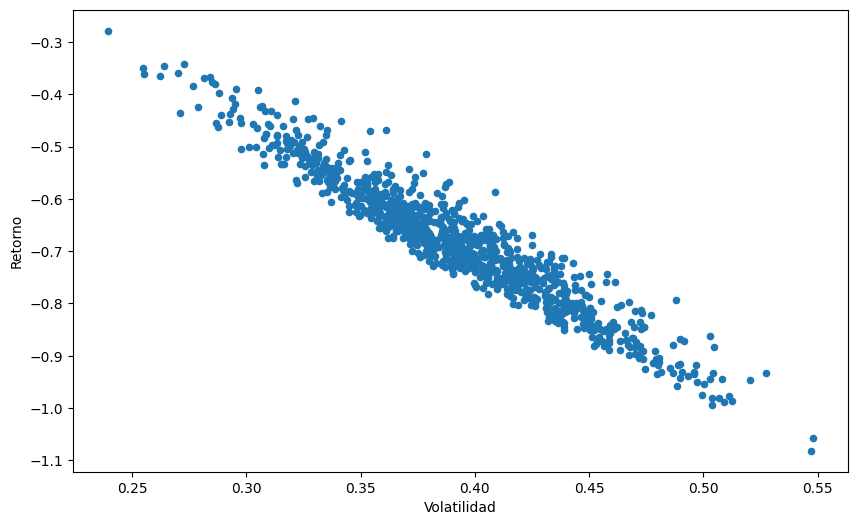

In [86]:
portafolios.plot(x='volatilidad',y='retorno',kind='scatter',figsize=(10,6))
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
